In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [63]:
data = pd.read_csv('../data/CC_GENERAL.csv')
X = data.drop('CUST_ID', axis=1)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [64]:
from sklearn.preprocessing import minmax_scale

X = X.dropna()
data = data.dropna()

for col in X.columns:
    X[col] = minmax_scale(X[col])
    
len(data)

8636

In [65]:
# EASY
# Сходу кажется, что логично разбить на 3 кластера по балансу, так же как в реальной жизни. Рабочий класс, средний и элита.

C:\Users\skfim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skfim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skfim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skfim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\skfim\anaconda3\Lib\site-packages\sklearn\clust

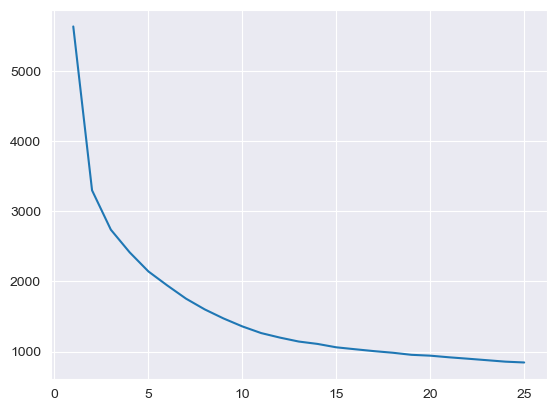

In [66]:
dist = []
for i in range(1, 26):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    dist.append(kmeans.inertia_)
    
plt.plot(range(1, 26), dist)
plt.show()

In [67]:
# Методом пристального взгялада, понимаем что оптимальное количество кластеров 3.

# kmeans = KMeans(n_clusters=3, random_state=42).fit_predict(X)
# X['clusters'] = kmeans
# sns.pairplot(X, hue='clusters')

In [68]:
# Выводы

# !!! Все графики положил в папку photo, потому что иначе гитхаб оч ругается

# Мысль про баланс оправдалась. Видно что кластеры действительно различаются по балансу.
# так же заметим что частота покупок и частоты покупок в рассрочку вместе с частотой покупок показываеют очень хорошее разделение. Что на самом деле тоже логично, потому что это по сути разделение пользователей по покупательской активности, но с ходу не очевидно.

In [69]:
# Normal
# X = X.drop('clusters', axis=1)
# agg = AgglomerativeClustering(n_clusters=3).fit_predict(X)
# X['clusters'] = agg
# sns.pairplot(X, hue='clusters')

In [70]:
# X = X.drop('clusters', axis=1)
# dbscan = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
# X['clusters'] = dbscan
# sns.pairplot(X, hue='clusters')

In [71]:
# Выводы
# agg по сути сделал тоже самое что и kmeans, на глаз чуть менее точное чем kmeans.
# dbscan сначала выглядит немножко странно, но сравнив с другими графиками видим что в один кластер он выделил элиту, что имеет права на жизнь, так как пропасть между элитой и средним классом кратное больше того же расстояния между рабочим и средним классом.